In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')
customers = pd.read_csv('Customers.csv')

In [3]:
# Display basic info for each dataset
print("Transactions Dataset Info:")
print(transactions.info())
print(transactions.head())
print("\nProducts Dataset Info:")
print(products.info())
print(products.head())
print("\nCustomers Dataset Info:")
print(customers.info())
print(customers.head())

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070     

In [4]:
# Descriptive statistics for numeric columns
print("\nTransactions Dataset Summary:\n", transactions.describe())
print("\nProducts Dataset Summary:\n", products.describe())
print("\nCustomers Dataset Summary:\n", customers.describe())


Transactions Dataset Summary:
           Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000

Products Dataset Summary:
             Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Customers Dataset Summary:
        CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [5]:
# Check for missing values
print("\nMissing Values in Transactions Dataset:\n", transactions.isnull().sum())
print("\nMissing Values in Products Dataset:\n", products.isnull().sum())
print("\nMissing Values in Customers Dataset:\n", customers.isnull().sum())


Missing Values in Transactions Dataset:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Missing Values in Products Dataset:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Customers Dataset:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64



Top 10 Products by Quantity Sold:
 ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64


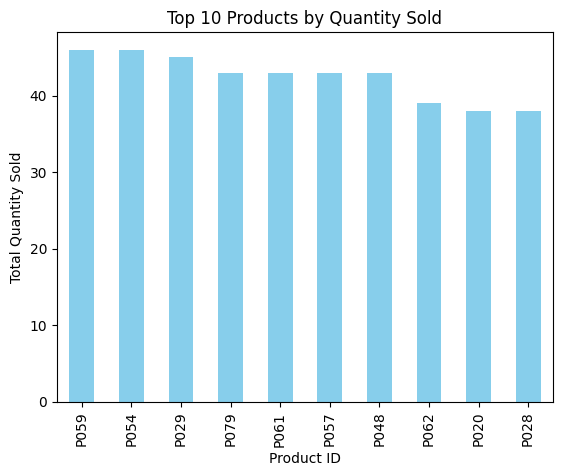

In [26]:
# Exploratory Analysis
# Transactions: Top products by sales
if 'ProductID' in transactions.columns and 'Quantity' in transactions.columns:
    top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
    print("\nTop 10 Products by Quantity Sold:\n", top_products)
    top_products.plot(kind='bar', title='Top 10 Products by Quantity Sold', color='skyblue')
    plt.xlabel('Product ID')
    plt.ylabel('Total Quantity Sold')
    plt.show()

Price Distribution Statistics:
count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


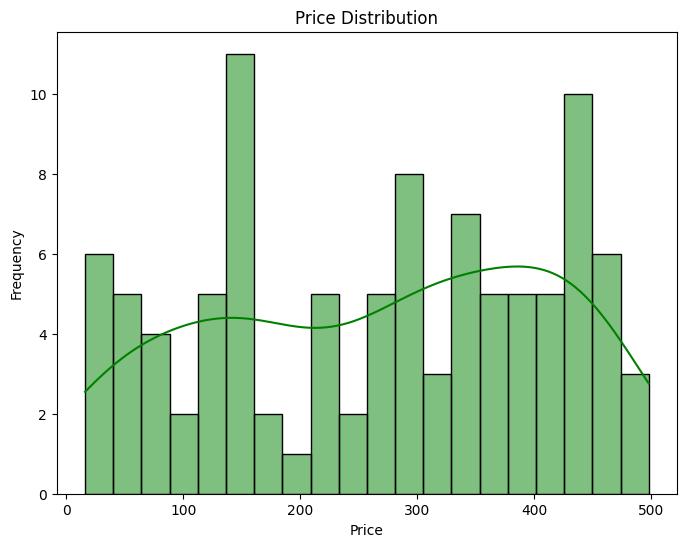

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'Price' in products.columns:
    # Print some basic statistics about the price distribution
    print("Price Distribution Statistics:")
    print(products['Price'].describe())  # Gives the count, mean, std, min, 25%, 50%, 75%, max

    plt.figure(figsize=(8, 6))
    sns.histplot(products['Price'], bins=20, kde=True, color='green')
    plt.title('Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()


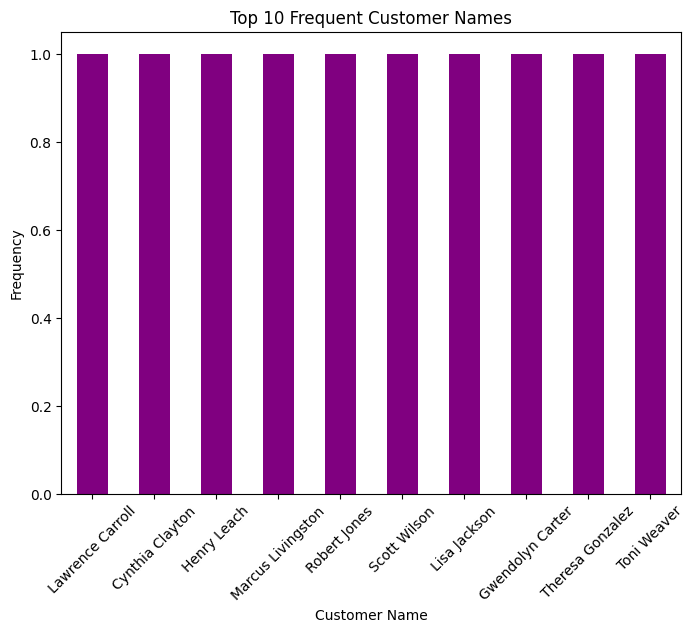

In [29]:
# 3. Frequent Customer Names
name_frequency = customers['CustomerName'].value_counts().head(10)

# Plot the most frequent customer names
plt.figure(figsize=(8, 6))
name_frequency.plot(kind='bar', color='purple', title='Top 10 Frequent Customer Names')
plt.xlabel('Customer Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



Correlation Matrix:
             Quantity  TotalValue   Price_x   Price_y
Quantity    1.000000    0.609972 -0.009378 -0.009378
TotalValue  0.609972    1.000000  0.722714  0.722714
Price_x    -0.009378    0.722714  1.000000  1.000000
Price_y    -0.009378    0.722714  1.000000  1.000000


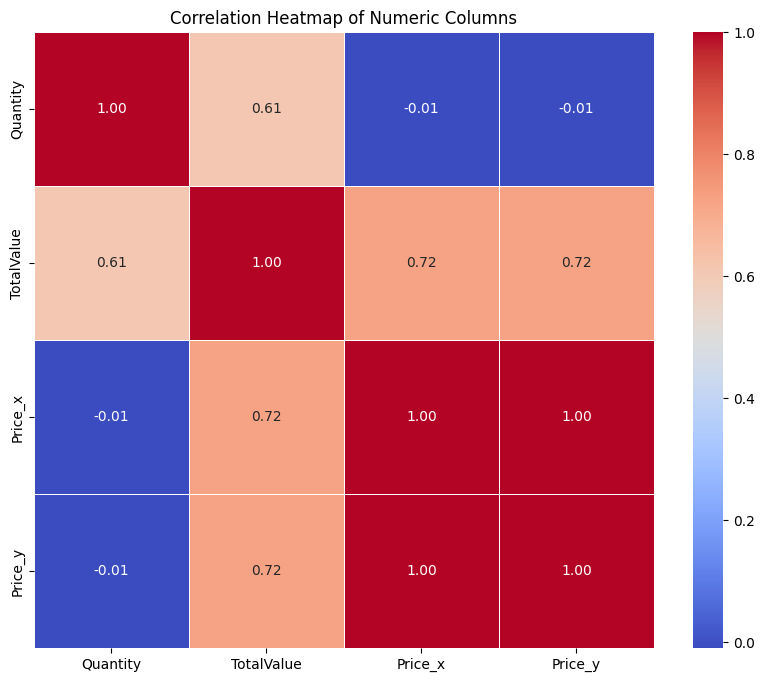

In [33]:
# Strip leading/trailing spaces from column names in all datasets
transactions.columns = transactions.columns.str.strip()
products.columns = products.columns.str.strip()
customers.columns = customers.columns.str.strip()

# Merge transactions with products on 'ProductID'
merged_transactions_products = pd.merge(transactions, products, on='ProductID', how='inner')

# Merge the above result with customers on 'CustomerID'
merged_data = pd.merge(merged_transactions_products, customers, on='CustomerID', how='inner')

# Check for numeric columns
numeric_columns = merged_data.select_dtypes(include=['number']).columns

if len(numeric_columns) > 1:
    # Compute correlations
    correlation_matrix = merged_data[numeric_columns].corr()
    print("\nCorrelation Matrix:\n", correlation_matrix)

    # Plot correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap of Numeric Columns')
    plt.show()
else:
    print("No numeric columns found across merged data to compute correlations.")
